In [1]:
import numpy as np
from scipy.interpolate import make_interp_spline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(data := (
    pd
    .read_csv('~/Desktop/pk_exp002_OD_curves_phase2.csv')  # exported from excel
    .drop(columns=['Unnamed: 2', 'OD raw'])  # unnecessary columns
))

,timestamp,elapsed time (hr),strain,condition,conc fact,blank,OD
0,7/13/24 6:00,0,KSF001,N-G+A+,4,0.041,0.068
1,7/13/24 6:00,0,KSF087,N-G+A+,4,0.041,0.072
2,7/13/24 6:00,0,KSF172,N-G+A+,4,0.041,0.060
3,7/13/24 6:00,0,KSF001,N-G-A+,4,0.039,0.076
4,7/13/24 6:00,0,KSF087,N-G-A+,4,0.039,0.068
5,7/13/24 6:00,0,KSF172,N-G-A+,4,0.039,0.012
6,7/13/24 6:00,0,KSF001,N-G+A-,4,0.043,0.064
7,7/13/24 6:00,0,KSF087,N-G+A-,4,0.043,-0.020
8,7/13/24 6:00,0,KSF172,N-G+A-,4,0.043,0.060
9,7/13/24 6:00,0,KSF001,N+G+A+,4,0.040,0.084


In [3]:
def smooth_curve(x, y):
    """smoothing function"""
    x_new = np.linspace(x.min(), x.max(), 300)  # 300 points for smooth curve
    spl = make_interp_spline(x, y, k=3)  # Cubic spline
    y_smooth = spl(x_new)
    return x_new, y_smooth

IndexError: index 3 is out of bounds for axis 0 with size 3

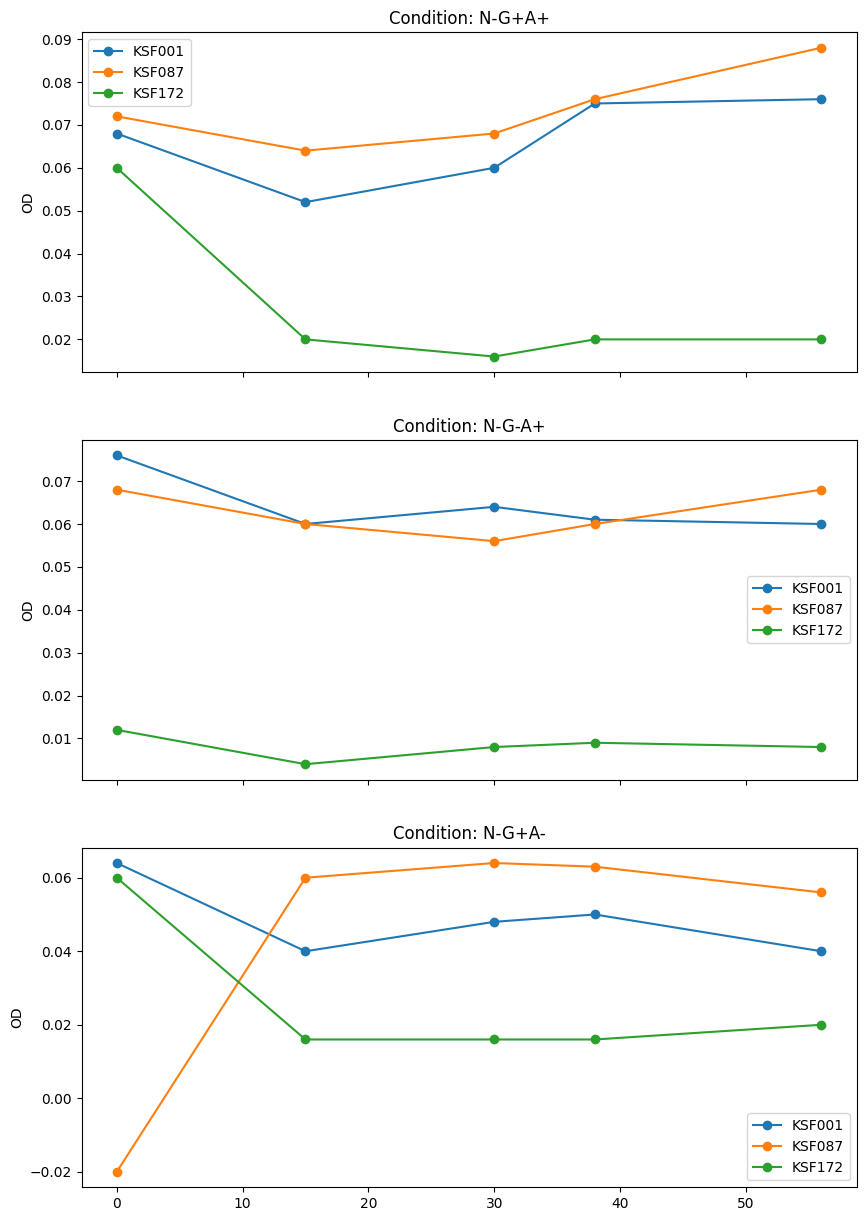

In [7]:
# Plot the OD over elapsed time for each condition with subplots for each strain
strains = data['strain'].unique()
conditions = data['condition'].unique()

fig, axes = plt.subplots(len(strains), 1, figsize=(10, 15), sharex=True)

for i, condition in enumerate(conditions):
    ax = axes[i]
    for strain in strains:
        subset = data[(data['strain'] == strain) & (data['condition'] == condition)]
        elapsed_time, optical_density = subset.loc[:,['elapsed time (hr)', 'OD']].values.T
        
        # # apply smoothing
        # elapsed_time, optical_density = smooth_curve(elapsed_time, optical_density)
        
        ax.plot(elapsed_time, optical_density, '-o', label=strain)
    # ax.set_title(f'Strain: {strain}')
    ax.set_title(f'Condition: {condition}')
    ax.set_ylabel('OD')
    ax.legend()
    
axes[-1].set_xlabel('Elapsed Time (hr)')
plt.tight_layout()
plt.show()

In [9]:
import seaborn as sns
# Set up the FacetGrid
g = sns.FacetGrid(
    # df_n_deplete_od,
    df_n_deplete_od.loc[lambda df: ~df.condition.fillna('4.').str.startswith('4.')],
    col="condition", hue="strain_id",
    col_wrap=3, height=4, aspect=1.5,
    sharey=True, sharex=True
)

# Map the lineplot function to each grid
g.map_dataframe(
    sns.lineplot,
    'elapsed_time_hr', 'od_sample',
    marker='o'
)

# Add legends and adjust layout
g.add_legend(title='Strain ID', loc='upper right')
g.set_axis_labels("Elapsed Time (hr)", "OD")
g.set_titles(col_template="{col_name}")
g.fig.suptitle("OD Curves for Different Strains and Conditions (post N+/PO4- culturing, washing, and resuspension) [w/o N+/PO4+ to scale in on low growth conditions]")

plt.tight_layout()
plt.show()

NameError: name 'df_n_deplete_od' is not defined